# Проект

Требуется написать модуль для сервиса разграничения доступа к информации для пользователей. Ваш модуль должен уметь принимать на вход фотографию пользователя и возвращать его логин в системе. Требования к модулю:

- модуль должен уметь определять, лицо какого пользователя пришло ему во входном изображении;
- модуль должен определять случаи, когда пришло лицо не зарегистрированного человека;
- если на фотографии несколько лиц, то распознавание лица не должно произойти;
- от каждого пользователя системы можно получить только одну фотографию-образец его лица;
- фотографии пользователей хранить запрещено.

Архитектура модуля будет следующей. Структура файлов:

    recognition
    |- model.py
    |- api.py
    |- user_mapping.py

Таким образом, наш модуль будет разделен на 3 части. Теперь опишем подробнее, что должно быть реализовано внутри каждого из этих файлов.

# 1. model.py

Начнем с файла, в котором описана обертка над моделью. Назовем класс-обертку `Model`.

Задачу распознавания лиц можно разделить на две задачи:
1. Детектирование лица, т.е. нахождение на изображении той области, на которой расположено лицо
2. Распознавание (классификация) лица на той области, которую мы получили из п. 1.

Обе эти задачи будем решать в рамках класса `Model`. Опишем протокол этого класса. Пример использования детектора и классификатора лиц будет ниже.

In [ ]:
import numpy as np
from typing import Optional, Union


class Model:
    image_size = (224, 224)

    def __init__(self):
        self.model_ready = False  # опишем флаг, который будет говорить нам о том, обучена ли модель.
                                  # если модель не обучена, мы не можем делать предсказания
        self.model =   # ваш код начальной подготовки модели
      

    @classmethod
    def detect_face(cls, image: Union[str, np.array]) -> np.array:
        """Функция, которая принимает строку с путём к файлу изображения
        или массив чисел - изображение (результат pyplot.imread).
        Возвращается массив чисел - новое изображение, где обрезано всё,
        кроме лица (результат работы детектора)"""
        # ваш код детектирования лица

    def get_face_embedding(self, image: Union[str, np.array]) -> np.array:
        """Метод, который возвращает эмбеддинг входного изображение. Входное изображение может подаваться
        как адрес файла в файловой системе либо как массив чисел, т.е. само изображение"""
        # ваш код получения эмбеддинга

    def compare(self, image1: np.array, image2: np.array) -> int:
        """Функция, которая принимает два массива чисел - изображений, и возвращает номер класса объекта, 
        предсказанный моделью. Если модель еще не обучена, нужно вызвать исключение"""
        if not self.model_ready:
            raise RuntimeError("Модель еще не обучена")
        # ваш код предсказания класса объекта

    def recognize_from_db(self, image: Union[str, np.array], db: "DataBase") -> Optional[str]:
        """Функция, которая принимает адрес изображения или само изображение в виде массива numpy,
        а также объект класса DataBase, описанный в соседнем файле, и возвращает логин пользователя,
        которому принадлежит лицо, либо None, если похожего человека нет в базе"""
        # ваш код поиска нужного человека в базе данных


## 2. database.py

В этом файле мы опишем класс `DataBase`, в который поместим логику работы с хранением сущностей зарегистрированных в нашей системе профилей. Фотографии пользователей хранить нельзя. Поэтому создадим базу данных, в которой будут храниться эмбеддинги, логины пользователей и дата регистрации. В качестве БД предлагается использовать csv-файл или SQLite, если вы с ней уже сталкивались.

In [ ]:
import numpy as np


class DataBase:
    BASE_DIR =  # сюда запишите константы, которые понадобятся для хранения данных

    def add_new_face(self, login: str, embedding: np.array):
        """Метод, который добавляет новое лицо в базу данных. Принимает на вход аргумент
        login - это строка-логин пользователя, а также аргумент embedding - это вектор
        чисел-эмбеддинг лица человека, который нужно сохранить в базу"""
        # ваш код здесь

    def update_face(self, login: str, embedding: np.array):
        """Метод, который обновляет лицо пользователя в базе. Аргументы - те же, что в add_new_face.
        В поле с датой добавления пользователя должна попасть дата обновления."""
        # ваш код здесь

    def delete_user(self, login):
        """Метод, который удаляет логин пользователя из базы данных. Обсудите с коллегами,
        стоит ли после удаления пользователя оставлять его фотографию в папке или нет"""
        # ваш код здесь

    def get(self, login: str) -> np.array:
        """Метод, который возвращает массив чисел - эмбеддинг, соответствующий логину пользователя"""
        # ваш код здесь

    def get_all(self) -> ???:
        """Этот метод должен возвращать все эмбеддинги для того, чтобы объект класса Model
        мог их сравнить с поступившим лицом. Продумайте, что он должен возвращать, исходя из 
        того, чтобы использование оперативной памяти было минимальным (ведь в нашей БД могут быть
        тысячи пользователей)"""
        # ваш код здесь

    def count(self) -> int:
        """Этот метод возвращает количество зарегистрированных в базе пльзователей"""
        # ваш код

    def clear(self):
        """Обнуление базы данных. Этот метод должен удалить все данные, но не сам файл базы"""
        # ваш код


## 3. api.py

В это файле опишем набор функций, который будет служить точкой входя для всех внешних потребителей нашего модуля. По сути это описание всего, что может сделать пользователь нашей системы в нашей системе. Этот подмодуль будет связующим между всеми компонентами нашей системы, и в нём будет описана та логика, которая будет объединять использование модели и базы данных.

Вам предлагается самостоятельно реализовать функции, которые будут позволять следующее:

- регистрация нового пользователя (логин + фото или URL фото)
- обновление данных о пользователе
- удаление пользователя
- определение пользователя на фотографии
- сравнение людей на двух фотографиях (URL фото или само фото)
- вывод статистики по БД: количество зарегистрированных пользователей
- обнуление базы данных

In [ ]:
import numpy as np
from typing import Union
from model import Model
from database import DataBase


def register_user(login: str, image: Union[str, np.array]):
    # ваш код

# ваш код остальных функций API


# Пример работы с моделями, распознающими лица

### Задача 1. Детектирование лиц

Перед тем, как распознавать лицо, нам необходимо решить еще одну задачу машинного зрения - детектирование лица. Для этого скачаем библиотеку <code>mtcnn</code> - в ней содержится модель каскадной архитектуры сверточной нейросети, которая хорошо себя показывает в задачах детектирования объектов на фото (<link>https://arxiv.org/abs/1604.02878</link>).

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 7.8 MB/s 


Считаем исходную фотографию с лицом.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


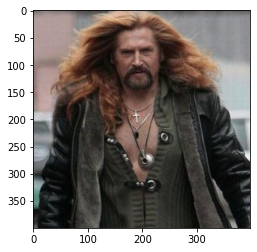

In [ ]:
from matplotlib import pyplot

img_path = "/content/drive/MyDrive/School21/Day11/data-samples/dzhigurda.jpg"
img = pyplot.imread(img_path)
pyplot.imshow(img)
pyplot.show()

Создадим экзепляр детектора и найдем на фотографии лицо.

In [ ]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
faces = detector.detect_faces(img)

В переменной faces - список списков найденных на фотографии лиц. В каждом списке - координаты верхнего левого угла прямоугольника с лицом, а также ширина и высота этого прямоугольника.

In [ ]:
x1, y1, width, height = faces[0]['box']
x2, y2 = x1 + width, y1 + height

Сохраним в переменную новое обрезанное изображение и посмотрим, что получилось. Лицо определено верно!

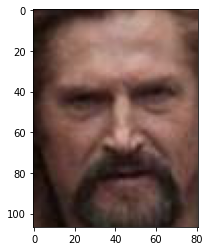

In [ ]:
from PIL import Image
import numpy as np

face = img[y1:y2, x1:x2]

face_image = Image.fromarray(face)
face_array = np.asarray(face_image)
pyplot.imshow(face_array)
pyplot.show()

### 2. Эмбеддинг и сравнение лиц

После того, как мы получили изображение лица, нам нужно преобразовать его в вектор по какому-то однозначному принципу, чтобы в этом векторном пространстве мы могли определять степень схожести двух лиц. Хорошо работает с лицами архитектура VGGFace. В примере будем использовать ее, а в проекте можете подобрать любую другую архитектуру, которая также заточена под классификацию лиц. Вообще говоря, в репозитории pypi есть достаточно большое количество пакетов, которые реализуют популярные архитектуры нейросетей на библиотеке keras. Например, мы можем установить пакет `keras-vggface`, в котором реализована нейронка, которая нам нужна для работы. Но такие пакеты реже обновляются, чем keras, и иногда могут не успеть за какими-то изменениями в API кераса. Поэтому надежней описать архитектуру самостоятельно. Найти описание архитектуры не трудно в гугле.

In [ ]:
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation, Dense


class VGGFace(Sequential):
    def __init__(self):
        super(VGGFace, self).__init__()  # наследуемся от базовой модели кераса, поэтому должны
                                         # выполнить всё, что заложено в ее инстанцирование из коробки
        self.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))  # а теперь описываем архитектуру VGGFace
        self.add(Convolution2D(64, (3, 3), activation='relu'))
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(64, (3, 3), activation='relu'))
        self.add(MaxPooling2D((2,2), strides=(2,2)))
        
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(128, (3, 3), activation='relu'))
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(128, (3, 3), activation='relu'))
        self.add(MaxPooling2D((2,2), strides=(2,2)))
        
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(256, (3, 3), activation='relu'))
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(256, (3, 3), activation='relu'))
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(256, (3, 3), activation='relu'))
        self.add(MaxPooling2D((2,2), strides=(2,2)))
        
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(512, (3, 3), activation='relu'))
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(512, (3, 3), activation='relu'))
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(512, (3, 3), activation='relu'))
        self.add(MaxPooling2D((2,2), strides=(2,2)))
        
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(512, (3, 3), activation='relu'))
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(512, (3, 3), activation='relu'))
        self.add(ZeroPadding2D((1,1)))
        self.add(Convolution2D(512, (3, 3), activation='relu'))
        self.add(MaxPooling2D((2,2), strides=(2,2)))
        
        self.add(Convolution2D(4096, (7, 7), activation='relu'))
        self.add(Dropout(0.5))
        self.add(Convolution2D(4096, (1, 1), activation='relu'))
        self.add(Dropout(0.5))
        self.add(Convolution2D(2622, (1, 1)))
        self.add(Flatten())
        self.add(Activation('softmax'))


vgg_model = VGGFace()  # создаем экземпляр модели

VGGFace - это нейронка, обученная на огромной выборке фотографий знаменитостей. Подбор весов требовал больших ресурсов и длился несколько дней. Но нам повезло - мы можем подгрузить уже готовые веса в модель, и с этими весами она будет строить отличные эмбеддинги для лиц.

In [ ]:
vgg_model.load_weights('/content/drive/MyDrive/School21/Day11/misc/vgg_face_weights.h5')

Выходной слой в оригинальной архитектуре - это классификатор на 2622 класса фотографий знаменитостей. Для сравнения случайных лиц он нам не нужен. Нам нужно то признаковое описание лица, которое производит сеть непосредственно перед классификацией. Уберем последний слой из сетки.

In [ ]:
from keras.models import Model

vgg_face_descriptor = Model(inputs=vgg_model.layers[0].input, outputs=vgg_model.layers[-2].output)
vgg_face_descriptor.summary()  # посмотрим на послойное описание модели

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_13_input (In  [(None, 224, 224, 3)]    0         
 putLayer)                                                       
                                                                 
 zero_padding2d_13 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_14 (ZeroPadd  (None, 226, 226, 64)     0         
 ing2D)                                                          
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                           

Сравнивать эмбеддинги можно через косинусное расстояние. Загрузим еще два изображения и сравним лица с них с наших исходным лицом выше.

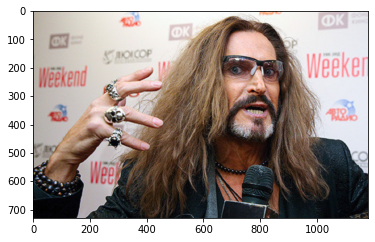

In [ ]:
class1_image = pyplot.imread("/content/drive/MyDrive/School21/Day11/data-samples/dzh.jpg")
pyplot.imshow(class1_image)

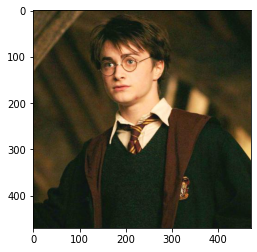

In [ ]:
class2_image = pyplot.imread("/content/drive/MyDrive/School21/Day11/data-samples/potter.jpg")
pyplot.imshow(class2_image)

Изображения лица нужно привести к тому размеру, с которым работает архитектура VGGFace, а именно, 224х224. Поэтому ниже выполняется метод reshape.

In [ ]:
test_array = np.asarray(face_image.resize((224, 224))).reshape(-1, 224, 224, 3)  # приводим картинку к нужному размеру
test_embedding = vgg_face_descriptor.predict(test_array)[0,:]  # прогоняем ее через модель, вычисляя эмбеддинг

Проделаем всё то же самое с нашими двумя новыми изображениями.

In [ ]:
x1, y1, width, height = detector.detect_faces(class1_image)[0]['box']
x2, y2 = x1 + width, y1 + height
face1 = class1_image[y1:y2, x1:x2]
class1_array = np.asarray(Image.fromarray(face1).resize((224, 224))).reshape(-1, 224, 224, 3)
class1_embedding = vgg_face_descriptor.predict(class1_array)[0,:]


In [ ]:
x1, y1, width, height = detector.detect_faces(class2_image)[0]['box']
x2, y2 = x1 + width, y1 + height
face2 = class2_image[y1:y2, x1:x2]
class2_array = np.asarray(Image.fromarray(face2).resize((224, 224))).reshape(-1, 224, 224, 3)
class2_embedding = vgg_face_descriptor.predict(class2_array)[0,:]


А теперь замерим косинусное расстояние между полученными эмбеддингами.

In [ ]:
from scipy.spatial.distance import cosine

In [ ]:
cosine(test_embedding, class1_embedding)  # чем больше получится расстояние, тем менее похожи люди на фотографиях

0.49006783962249756

In [ ]:
cosine(test_embedding, class2_embedding)

0.6194637715816498

Когда мы будем проводить классификацию людей по базе данных, нам нужно будет эмпирически подобрать порог, по которому мы будем относить людей к одному из классов. Если значение будет ниже этого порога для всех эмбеддингов из базы данных, значит на фото человек, с которым наша система не знакома.